##  Project objects
- Clean dirty log data and transform it for analytics.
- Exploratory data analysis, e.g. find user activity levels for different events, and user interaction with web components.
- Find the conversion rate of users, identify key factors that bottleneck the conversion rate.
- Propose any hypothesis and set up experiments for testing.
- Build machine learning models to predict user behaviors, including but not limited to signup, churn, etc.
- Discover interesting insights in the dataset and suggest how to improve the user signup rate.

In [184]:
import pandas as pd
import os
import datetime

In [288]:
def to_date(epoch):
    return datetime.datetime.fromtimestamp(epoch/1000).strftime("%Y-%m-%d")
# first convert from milliseconds to seconds, and then convert format from time stamp

In [189]:
# this finds our txt files
filename = "data/sensorswww_data.txt"
data = []
for line in open(filename, 'r'):
    data.append(json.loads(line))

In [289]:
# total number of rows
len(data)

75092

In [313]:
# here I define my pandas Dataframe with the columns I want to get from the text
nocache = []
dist_id = []
event = []

browser = []
browser_v = []
ip = []
is_fd = []
is_ft = []
latest_r = []
latest_rh = []
latest_ch = []
latest_utm_campaign = []
latest_utm_content = []
latest_utm_m = []
latest_utm_s = []
latest_utm_t = []
model = []
os = []
os_version = []
screen_h = []
screen_w = []
session_r = []
session_rh = []
time = []
day = []

pageP = []
pageS = []
pageUrl = []
session_p = []
name = []
requestBtn = []
isSuccess = []
isMsg = []
page = []
site_url = []
from_url = []
referrerUrl = []
referrHostUrl = []
siteUrl = []
url_path = []
url = []
title = []
result = []
referrer = []
refer_Host = []
title = []
ch = []
tp = []

In [314]:
#define NA and use get to assign NA when the key value not found 
na = None

for i in range(len(data)):
    tp.append(data[i].get('type',na))
    nocache.append(data[i].get('_nocache',na)) 
    dist_id.append(data[i]['distinct_id'])
    event.append(data[i].get('event',na))
    pageP.append(data[i]['properties'].get('pagePosition',na))
    pageS.append(data[i]['properties'].get('pageStayTime',na))
    pageUrl.append(data[i]['properties'].get('pageUrl',na))
    session_p.append(data[i]['properties'].get('session_page_url',na))
    latest_r.append(data[i]['properties'].get('$latest_referrer',na)) 
    latest_rh.append(data[i]['properties'].get('$latest_referrer_host',na))
    latest_ch.append(data[i]['properties'].get('_latest_ch',na))
    latest_utm_campaign.append(data[i]['properties'].get('$latest_utm_campaign',na))
    latest_utm_content.append(data[i]['properties'].get('$latest_utm_content',na))
    latest_utm_m.append(data[i]['properties'].get('$latest_utm_medium',na))
    latest_utm_s.append(data[i]['properties'].get('$latest_utm_source',na))
    latest_utm_t.append(data[i]['properties'].get('$latest_utm_term',na))
    name.append(data[i]['properties'].get('name',na))
    requestBtn.append(data[i]['properties'].get('requestBtn',na))
    isSuccess.append(data[i]['properties'].get('isSuccess',na))
    isMsg.append(data[i]['properties'].get('isMsg',na))
    page.append(data[i]['properties'].get('page',na))
    site_url.append(data[i]['properties'].get('site_url',na))
    from_url.append(data[i]['properties'].get('from_url',na))
    referrerUrl.append(data[i]['properties'].get('referrerUrl',na))
    referrHostUrl.append(data[i]['properties'].get('referrHostUrl',na))
    siteUrl.append(data[i]['properties'].get('siteUrl',na))
    url_path.append(data[i]['properties'].get('$url_path',na))
    url.append(data[i]['properties'].get('$url',na))
    result.append(data[i]['properties'].get('result',na))
    referrer.append(data[i]['properties'].get('$referrer',na))
    refer_Host.append(data[i]['properties'].get('$referrer_host',na))
    title.append(data[i]['properties'].get('$title',na))
    ch.append(data[i]['properties'].get('$referrer_host',na))        
    browser.append(data[i]['properties'].get('$browser',na)) 
    browser_v.append(data[i]['properties'].get('$browser_version',na)) 
    ip.append(data[i]['properties'].get('$ip',na)) 
    is_fd.append(data[i]['properties'].get('$is_first_day',na)) 
    is_ft.append(data[i]['properties'].get('$is_first_time',na))      
    model.append(data[i]['properties'].get('$model',na))
    os.append(data[i]['properties'].get('$os',na))
    os_version.append(data[i]['properties'].get('$os_version',na))
    screen_h.append(data[i]['properties'].get('$screen_height',na))
    screen_w.append(data[i]['properties'].get('$screen_width',na))
    session_r.append(data[i]['properties'].get('_session_referrer',na))
    session_rh.append(data[i]['properties'].get('_session_referrer_host',na))
    time.append(data[i]['time'])
    day.append(to_date(data[i]['time']))

In [315]:
#generate pandas dataframe
df = pd.DataFrame({'nocache':nocache, 
    'dist_id': dist_id,
    'event':event,
    'browser':browser,
    'browser_v':browser_v,
    'ip':ip,
    'is_fd':is_fd,
    'is_ft':is_ft,
    'latest_r':latest_r,
    'latest_rh':latest_rh,
    'latest_ch':latest_ch,
    'latest_utm_campaign':latest_utm_campaign,
    'latest_utm_content':latest_utm_content,
    'latest_utm_m':latest_utm_m,
    'latest_utm_s':latest_utm_s,
    'latest_utm_t':latest_utm_t,
    'model':model,
    'os':os,
    'os_version':os_version,
    'screen_h':screen_h,
    'screen_w':screen_w,
    'screen_r':session_r,
    'screen_rh':session_rh,
    'time':time,
    'pageP':pageP,
    'pageS':pageS,
    'pageUrl':pageUrl,
    'session_p':session_p,
    'name':name,
    'requestBtn':requestBtn,
    'isSuccess':isSuccess,
    'isMsg':isMsg,
    'page':page,
    'site_url':site_url,
    'from_url':from_url,
    'referrerUrl':referrerUrl,
    'referrHostUrl':referrHostUrl,
    'siteUrl':siteUrl,
    'url_path':url_path,
    'url':url,
    'title':title,
    'result':result,
    'referrer':referrer,
    'refer_Host':refer_Host,
    'ch':ch,
    'tp':tp,
    'day':day})

In [316]:
df.head()

,browser,browser_v,ch,day,dist_id,event,from_url,ip,isMsg,isSuccess,...,screen_rh,screen_w,session_p,siteUrl,site_url,time,title,tp,url,url_path
0,chrome,56,None,2017-03-06,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,None,219.135.131.99,None,None,...,www.baidu.com,1280.0,https://www.sensorsdata.cn/?utm_source=baidu&u...,None,None,1488791047953,None,track,None,None
1,None,None,None,2017-03-31,9939d3e087bca29c42334d96dccd25ca0e06652a,None,None,None,None,None,...,None,NaN,None,None,None,1490958296645,None,profile_set_once,None,None
2,chrome,56,,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,None,111.204.198.242,None,None,...,,1366.0,https://sensorsdata.cn/?ch=demo,None,None,1488791050856,神策数据 | Sensors Data - 国内领先的用户行为分析产品,track,https://sensorsdata.cn/?ch=demo,/
3,chrome,56,None,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,None,111.204.198.242,None,None,...,,1366.0,https://sensorsdata.cn/?ch=demo,None,None,1488791051772,None,track,None,None
4,chrome,56,None,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,None,111.204.198.242,None,None,...,,1366.0,https://sensorsdata.cn/?ch=demo,None,None,1488791056032,None,track,None,None


In [317]:
# Create Pandas DataFrame filters based on different events
df_ileave = df.loc[df.event == 'index_leave']
df_btnclick = df.loc[df.event == 'btnClick']
df_aleave = df.loc[df.event == 'about_leave']
df_form = df.loc[df.event == 'formSubmit']
df_submit = df.loc[df.event == 'clickSubmit']
df_cleave = df.loc[df.event == 'courses_leave']
df_dleave = df.loc[df.event == 'demo_leave']
df_playleave = df.loc[df.event == 'courses_play_leave']
df_close = df.loc[df.event == 'page_close']
df_view = df.loc[df.event == '$pageview']
df_send = df.loc[df.event == 'click_send_cellphone']
df_verify = df.loc[df.event == 'verify_cellphone_code']

In [318]:
# save DataFrame to csv file
ileave = 'data/index_leave.csv'
df_ileave.to_csv(ileave, index=False)
btnclick = 'data/btnClick.csv'
df_btnclick.to_csv(btnclick, index=False)
aleave = 'data/about_leave.csv'
df_aleave.to_csv(aleave, index=False)
form = 'data/formSubmit.csv'
df_form.to_csv(form, index=False)
submit = 'data/clickSubmit.csv'
df_submit.to_csv(submit, index=False)
cleave = 'data/courses_leave.csv'
df_cleave.to_csv(cleave, index=False)
dleave = 'data/demo_leave.csv'
df_dleave.to_csv(dleave, index=False)
playleave = 'data/courses_play_leave.csv'
df_playleave.to_csv(playleave, index=False)
close = 'data/page_close.csv'
df_close.to_csv(close, index=False)
view = 'data/pageview.csv'
df_view.to_csv(view, index=False)
send = 'data/click_send_cellphone.csv'
df_send.to_csv(send, index=False)
verify = 'data/verify_cellphone_code.csv'
df_verify.to_csv(verify, index=False)

In [319]:
df['tp'].value_counts()

track               65673
profile_set_once     9419
Name: tp, dtype: int64

track: keep track of an event, as shown in events below
profile set once: used for first time activate, register, ignored when profile already exist

In [320]:
df['event'].value_counts()

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

- possible user behavior analysis: pageview, btnClick
- funnel analysis: formSubmit(791) > click_send_cellphone(600) > verify_cellphone_code(563) > clickSubmit(513)

Do more EDA here

In [269]:
import matplotlib.pyplot as plt
% matplotlib inline

In [340]:
df['dist_id'].describe()

count                                        75092
unique                                       11756
top       835cc4405ee7e42e5b401a25e65b4830b02af7d3
freq                                           254
Name: dist_id, dtype: object

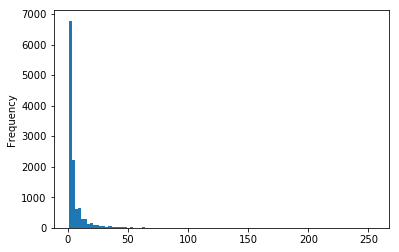

In [321]:
# e.g. calculate counts of distinct id, and plot it
df['dist_id'].value_counts().plot.hist(bins=100)

In [322]:
df['ip'].describe()

count               65673
unique               9870
top       113.208.116.250
freq                 1399
Name: ip, dtype: object

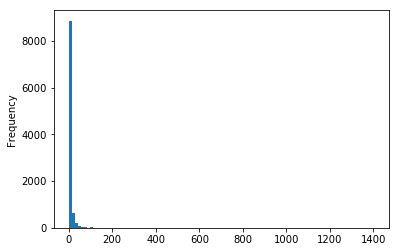

In [323]:
df['ip'].value_counts().plot.hist(bins=100)

In [328]:
df['day'].describe()

count          75092
unique            10
top       2017-03-09
freq           10150
Name: day, dtype: object

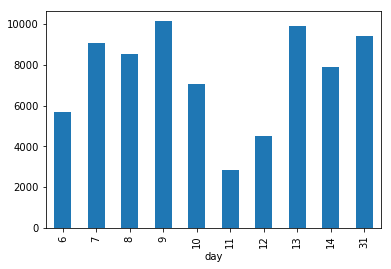

In [338]:
df["day"] = df["day"].astype("datetime64")
df["day"].groupby(df["day"].dt.day).count().plot(kind="bar")

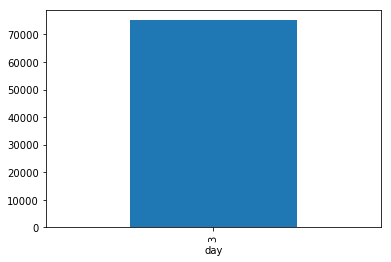

In [339]:
df["day"].groupby(df["day"].dt.month).count().plot(kind="bar")

All the data collected on March 2017, and only distribute in 6th-14th and 31st

Check missing data and propose possible missing data imputation

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75092 entries, 0 to 75091
Data columns (total 47 columns):
browser                65673 non-null object
browser_v              65673 non-null object
ch                     32335 non-null object
day                    75092 non-null datetime64[ns]
dist_id                75092 non-null object
event                  65673 non-null object
from_url               982 non-null object
ip                     65673 non-null object
isMsg                  469 non-null object
isSuccess              791 non-null object
is_fd                  65673 non-null object
is_ft                  65673 non-null object
latest_ch              8537 non-null object
latest_r               64862 non-null object
latest_rh              64862 non-null object
latest_utm_campaign    39903 non-null object
latest_utm_content     38763 non-null object
latest_utm_m           39691 non-null object
latest_utm_s           40583 non-null object
latest_utm_t           39095 non-nu

In [325]:
df.isnull().sum()

browser                 9419
browser_v               9419
ch                     42757
day                        0
dist_id                    0
event                   9419
from_url               74110
ip                      9419
isMsg                  74623
isSuccess              74301
is_fd                   9419
is_ft                   9419
latest_ch              66555
latest_r               10230
latest_rh              10230
latest_utm_campaign    35189
latest_utm_content     36329
latest_utm_m           35401
latest_utm_s           34509
latest_utm_t           35997
model                   9419
name                   59922
nocache                    0
os                      9419
os_version              9419
page                   63376
pageP                  58602
pageS                  58372
pageUrl                44736
refer_Host             42757
referrHostUrl          74623
referrer               42758
referrerUrl            74623
requestBtn             70821
result        

conversion rate (the percentage of users who take a desired action) analyses

In [341]:
df['event'].value_counts()

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

In [368]:
df_dleave['dist_id'].describe()

count                                         3411
unique                                        1436
top       87091bab3fc571740f15ac4021efc4c7674776d5
freq                                            31
Name: dist_id, dtype: object

In [344]:
df_send['dist_id'].describe()

count                                          600
unique                                         501
top       cc03b92cbfeebd715cd97f7f3d0cff31d96322a8
freq                                             6
Name: dist_id, dtype: object

In [347]:
df_verify['dist_id'].describe()

count                                          563
unique                                         472
top       cc03b92cbfeebd715cd97f7f3d0cff31d96322a8
freq                                             6
Name: dist_id, dtype: object

In [371]:
df_verify['result'].describe()

count     563
unique      3
top        正确
freq      528
Name: result, dtype: object

In [372]:
df_verify['dist_id'][df_verify['result']=='正确'].describe()

count                                          528
unique                                         471
top       cc03b92cbfeebd715cd97f7f3d0cff31d96322a8
freq                                             6
Name: dist_id, dtype: object

Only one id has wrong verification code

In [348]:
df_form['dist_id'].describe()

count                                          791
unique                                         497
top       04b0e0ed4def01a7a2881d3d8aa55c341a36cbbc
freq                                            17
Name: dist_id, dtype: object

In [349]:
df_submit['dist_id'].describe()

count                                          513
unique                                         461
top       1e31a9423d07802ba5fe38822ac548ae9c33a14d
freq                                            24
Name: dist_id, dtype: object

In [355]:
print("conversation rate of click send cellphone:")
print(501/11756)

conversation rate of click send cellphone:
0.042616536236815244


In [356]:
print("conversation rate of verify cellphone code:")
print(472/11756)

conversation rate of verify cellphone code:
0.040149710785981625


In [352]:
print("conversation rate of form submit:")
print(497/11756)

conversation rate of form submit:
0.04227628445049336


In [357]:
print("conversation rate of click submit:")
print(461/11756)

conversation rate of click submit:
0.03921401837359646


The key factors that bottleneck the conversion rate is sign up/send celpphone verification

In [359]:
df_btnclick.latest_ch.value_counts()

demo             1827
zhihu             100
pedaily            53
ebiz_demo_doc      23
itjuzi             10
chiyuan             6
sangwf              4
edu_demo_doc        3
36kr                2
sangwenfeng         1
Name: latest_ch, dtype: int64

In [360]:
df_btnclick.page.value_counts()

index            7964
demo             2242
about             816
courses_index     694
Name: page, dtype: int64

In [361]:
df_btnclick.name.value_counts()

request     2967
demo        2783
document    2067
product     1942
b-round     1245
about        925
blog         803
viedo        550
logo         508
mail          76
Name: name, dtype: int64

In [367]:
df_view.title.value_counts(dropna=True)

神策数据 | Sensors Data - 国内领先的用户行为分析产品                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     13700
神策分析|Sensors Analytics-帮你实现数据驱动－demo                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [370]:
df_view.ch.value_counts()[df_view['ch'].value_counts()>10]

www.sensorsdata.cn                        12634
                                           7091
www.baidu.com                              6284
sensorsdata.cn                             2764
m.baidu.com                                 816
www.sogou.com                               352
36kr.com                                    208
www.google.com.hk                           166
www.google.com                              156
localhost                                   154
m.sogou.com                                 147
link.zhihu.com                              146
wap.sogou.com                               144
www.so.com                                   67
image.baidu.com                              67
www.google.co.jp                             48
googleads.g.doubleclick.net                  41
ebizdemo.cloud.sensorsdata.cn                41
www.woshipm.com                              34
cn.bing.com                                  33
zhidao.baidu.com                        

Analysis on the reason for demo leave

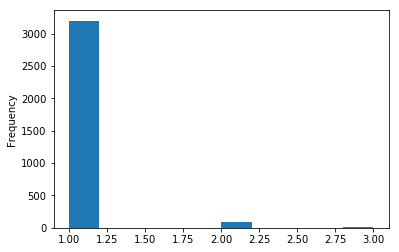

In [380]:
df_dleave['pageS'].value_counts().plot.hist(bins=10)

Most user stay at the page for a short time, and do not go to cellphone verification step, and confirms our assumption about the bottleneck in signup rate